
# Project: Investigate a Dataset: (no show up appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#foreword">Before You get into the dataset..</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

the no-showup dataset provides data for patients during about various stuff about the patients including wether they showed up at the appointment or not.The data supposed to be investigatied to know what factors are most likely to occur when patients don't show up to their appointments 😁

here is an explanation of some of the columns that might be confusing
<br>Gender --> the gender of patient(M is for male,F is for female)
<br>ScheduledDay--> the date and time of the day the patient booked an appointment
<br>AppointmentDay--> the date and time the patient had the appointment
<br>Scholarship--> wether the patient had a scholarship or not(0 for no 1 for yes)
<br>hipertension, diabetes, Alchoholism--> wether the patient had a condition of the previous or not(0 for no 1 for yes)
<br>Handcap-->the number of handicaps the patient had
<br>SMS received-->wether the patient was sent an SMS prior to the appointment or not((0 for no 1 for yes))

Questions to be dicussed:
<ol type = "1">
         <li>what age group doesn't show up the most</li>
         <li>is having a scholarship a reason for higher instances of showing up or not</li>
         <li>does sending an SMS help in having a higher chance of show up</li>
         <li>does having hypertension,diabetes,a handicap or being alchoholic lead to a higher percentage of patients not showing up </li>
         <li>which has a higher probalility of not showing up females or males</li>
         <li>What day of the week has the most show up percentage</li>
         <li>Which neighbourhood has the highest no show percentage</li>
      </ol>


In [1]:
#importing python libraries used in analysis
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

<a id='foreword'></a>
## Before You get into the dataset..



### these are the outside sources I needed to complete this project
<ul>
  <li>pandas, matplotlib and seaborn documentation for refreshing memory or finding more effective ways to do some tasks.
</li>
  <li>stackoverflow and geeks for geeks for error management or understanding some stuff I couldn't get the hang of. </li>
</ul>


<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### loading dataset

In [2]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


#### getting parameters of dataset [rows and columns ]

In [3]:
df.shape

(110527, 14)

#### some info about the dataset like minimums and maximums

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### in the next few cells I am just getting a little idea about how much of a variable there is.e.g how much people received SMS and such

In [5]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [6]:
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [7]:
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [8]:
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [9]:
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [10]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

the number of people with more than no handicaps is almost insignificant

In [11]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [34]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

# data cleaning/preparing:

### 1. PatientId, AppointmentID  columns seemed irrelevant to the analysis so I dropped them

In [13]:
df= df.drop(['PatientId','AppointmentID'],axis=1)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### 2.some column names had spelling mistakes so I corrected them like 'hipertension' instead of 'hypertension'.


In [14]:
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap', 'No-show':'No_show'},inplace=True)
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### 4.separating appointment date column into day, month and hour 

In [38]:
#Apoointmen date separation to hours,day of week,month,year
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['Appointment_hour']=df['ScheduledDay'].dt.hour
df['Appointment_Month']=df['ScheduledDay'].dt.month
df['Appointment_day']=df['ScheduledDay'].dt.day_name() #one with underscore indicate day of week not like original column indicating date
df['Ayear']=df['ScheduledDay'].dt.year

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,SMonth,Sday,Syear,Ahour,AMonth,Appointment_day,Ayear,Age_groups,Appointment_hour,Appointment_Month
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,...,4,Friday,2016,18,4,Friday,2016,elderly,18,4
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,...,4,Friday,2016,16,4,Friday,2016,adult,16,4
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,...,4,Friday,2016,16,4,Friday,2016,elderly,16,4
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,...,4,Friday,2016,17,4,Friday,2016,child,17,4
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,...,4,Friday,2016,16,4,Friday,2016,adult,16,4


### 5.the minimum age in this data set is -1 and assigned to one row only  which is probably a mistake so it's better to drop the row entirely

In [17]:
##checking of index and amount of rows with the value
df.query('Age ==-1')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Shour,SMonth,Sday,Syear,Ahour,AMonth,Appointment_day,Ayear
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No,8,6,Monday,2016,8,6,Monday,2016


In [36]:
#dropping the row with age=-1
df=df.drop(df.index[[99832]])

### 6. Assigning age groups
<ul>
  <li>child:0-12</li>
  <li>teen:12-18</li>
  <li>adult:19-60</li>
  <li>elderly:60 and above</li>
   

</ul>



In [19]:
age_groups=[]

for row in df['Age']:
    if 0<=row<12:
        age_groups.append('child')
    if 12<=row<18:
        age_groups.append('teen')
    if 18<=row<60:
        age_groups.append('adult')
    if row>=60:
        age_groups.append('elderly')
df['Age_groups']=age_groups
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,No_show,Shour,SMonth,Sday,Syear,Ahour,AMonth,Appointment_day,Ayear,Age_groups
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,...,No,18,4,Friday,2016,18,4,Friday,2016,elderly
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,...,No,16,4,Friday,2016,16,4,Friday,2016,adult
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,...,No,16,4,Friday,2016,16,4,Friday,2016,elderly
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,...,No,17,4,Friday,2016,17,4,Friday,2016,child
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,...,No,16,4,Friday,2016,16,4,Friday,2016,adult


<a id='eda'></a>
## Exploratory Data Analysis




In [20]:
#determine style for plots
plt.style.use('seaborn-pastel')

In [37]:
#creating function for a plot that will be used a lot in analysis 
def count_plot(df,xVar,hueVar):
    """
    a functions that plots a vcount plot using seaborn
    
    inputs:
    df: the dataframe data is stored into
    xVar: the x wariable that is in the plot
    hueVar: the variable to be colored differently when they have different values
    output:
    the plot that counts each case in xVar by counts of hueVar
    """
    sns.countplot(data=df, x=xVar, hue=hueVar)
    plt.title('relation between {} and {} counts'.format(xVar,hueVar))

### 1.what age group doesn't show up the most

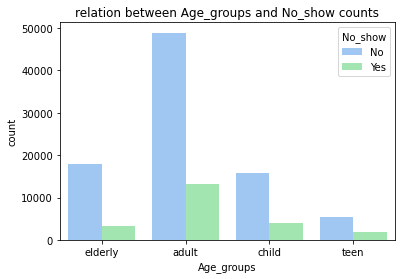

In [22]:
##showing Age groups against no show counts 

count_plot(df,'Age_groups', 'No_show')


apparently more adults (aka ages18-60 ) had the highest no show percentage at almost 15000 patients but maybe it isn't a huge breakthrough since the amount of adults in the dataset is large

### 2.is having a scholarship a reason for higher instances of showing up or not

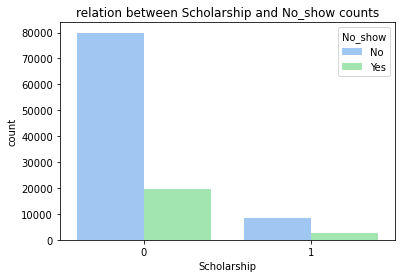

In [23]:
##showing Scholarship against no show counts 
count_plot(df,'Scholarship','No_show')


the graph seems to indicate that having a scholarship decreases the chances of not showing up it's real close to zero but at the same time it seems like not a lot of people are enrolled in the scholarship program 

### 3. does sending an SMS help in having a higher chance of show up 

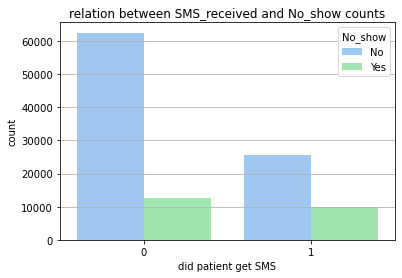

In [24]:
# 1 is for received 0 is for didn't receive an SMS
##showing SMS received against no show counts 

count_plot(df,'SMS_received','No_show')
plt.xlabel('did patient get SMS') 
plt.grid( axis='y')

apparently it doesn't matter wether the hospital sent an SMS or not because the amount of No show ups are really close ¯\_(ツ)_/¯

### 4.does having hypertension,diabetes, or a handicap or being alchoholic lead to a higher percentage of patients not showing up 

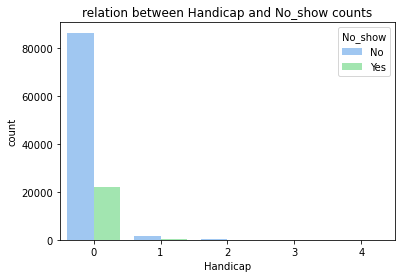

In [25]:
##showing handicap against no show counts 

count_plot(df,'Handicap','No_show')


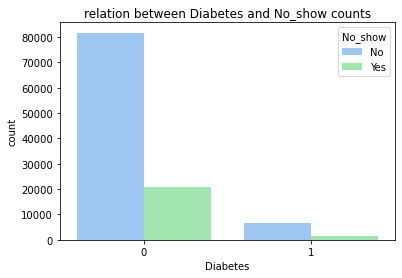

In [26]:
##showing Diabetes against no show counts 

count_plot(df,'Diabetes','No_show')


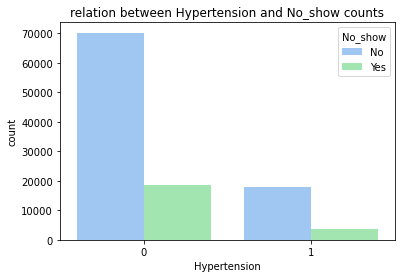

In [27]:
##showing Hypertension against no show counts 

count_plot(df,'Hypertension','No_show')


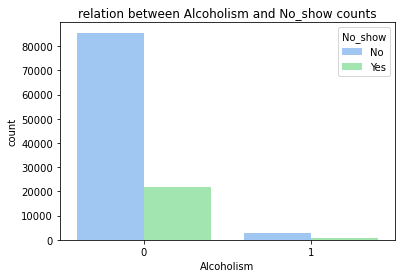

In [28]:
##showing Alchoholism against no show counts 

count_plot(df,'Alcoholism','No_show')


all the above doesn't prove that having a condition of the mentioned in the title affects the amount of people not showing up simply because the number of people having the condition is much lower(relatively) than the people who don't have the condition. maybe hypertension numbers are the best to compare in

### 5. which has a higher probalility of not showing up females or males

Text(0.5, 1.0, 'percentage pf males to females')

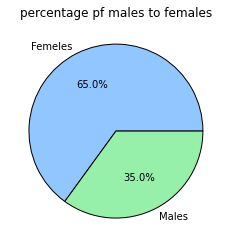

In [29]:
##knowing the percentage of males and females
plt.pie(df['Gender'].value_counts(),labels=['Femeles','Males'],autopct='%1.1f%%',wedgeprops={"edgecolor":"black"})
plt.title('percentage pf males to females')

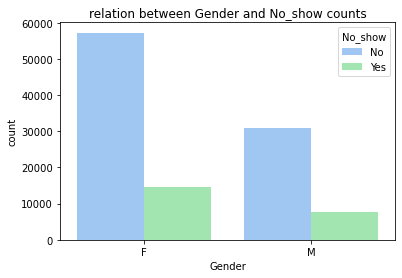

In [30]:
##showing gender against no show counts 

count_plot(df,'Gender','No_show')

it's apparent here that the amount of no show ups are higher from females

### 6. What day of the week has the most show up percentage

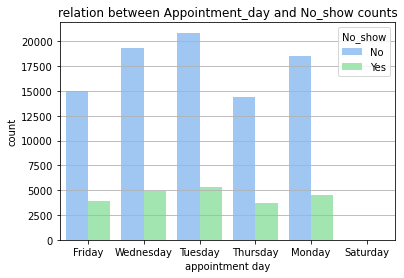

In [31]:
##showing Appointment day against no show counts 

count_plot(df,'Appointment_day','No_show')
plt.xlabel('appointment day')
plt.grid( axis='y')

note:there's no appointments on saturday and sunday as they in the weekend
<br> The numbers of no show ups are really close but the highest is on Tuesday 

### 7.  Which neighbourhood has the highest no show number 

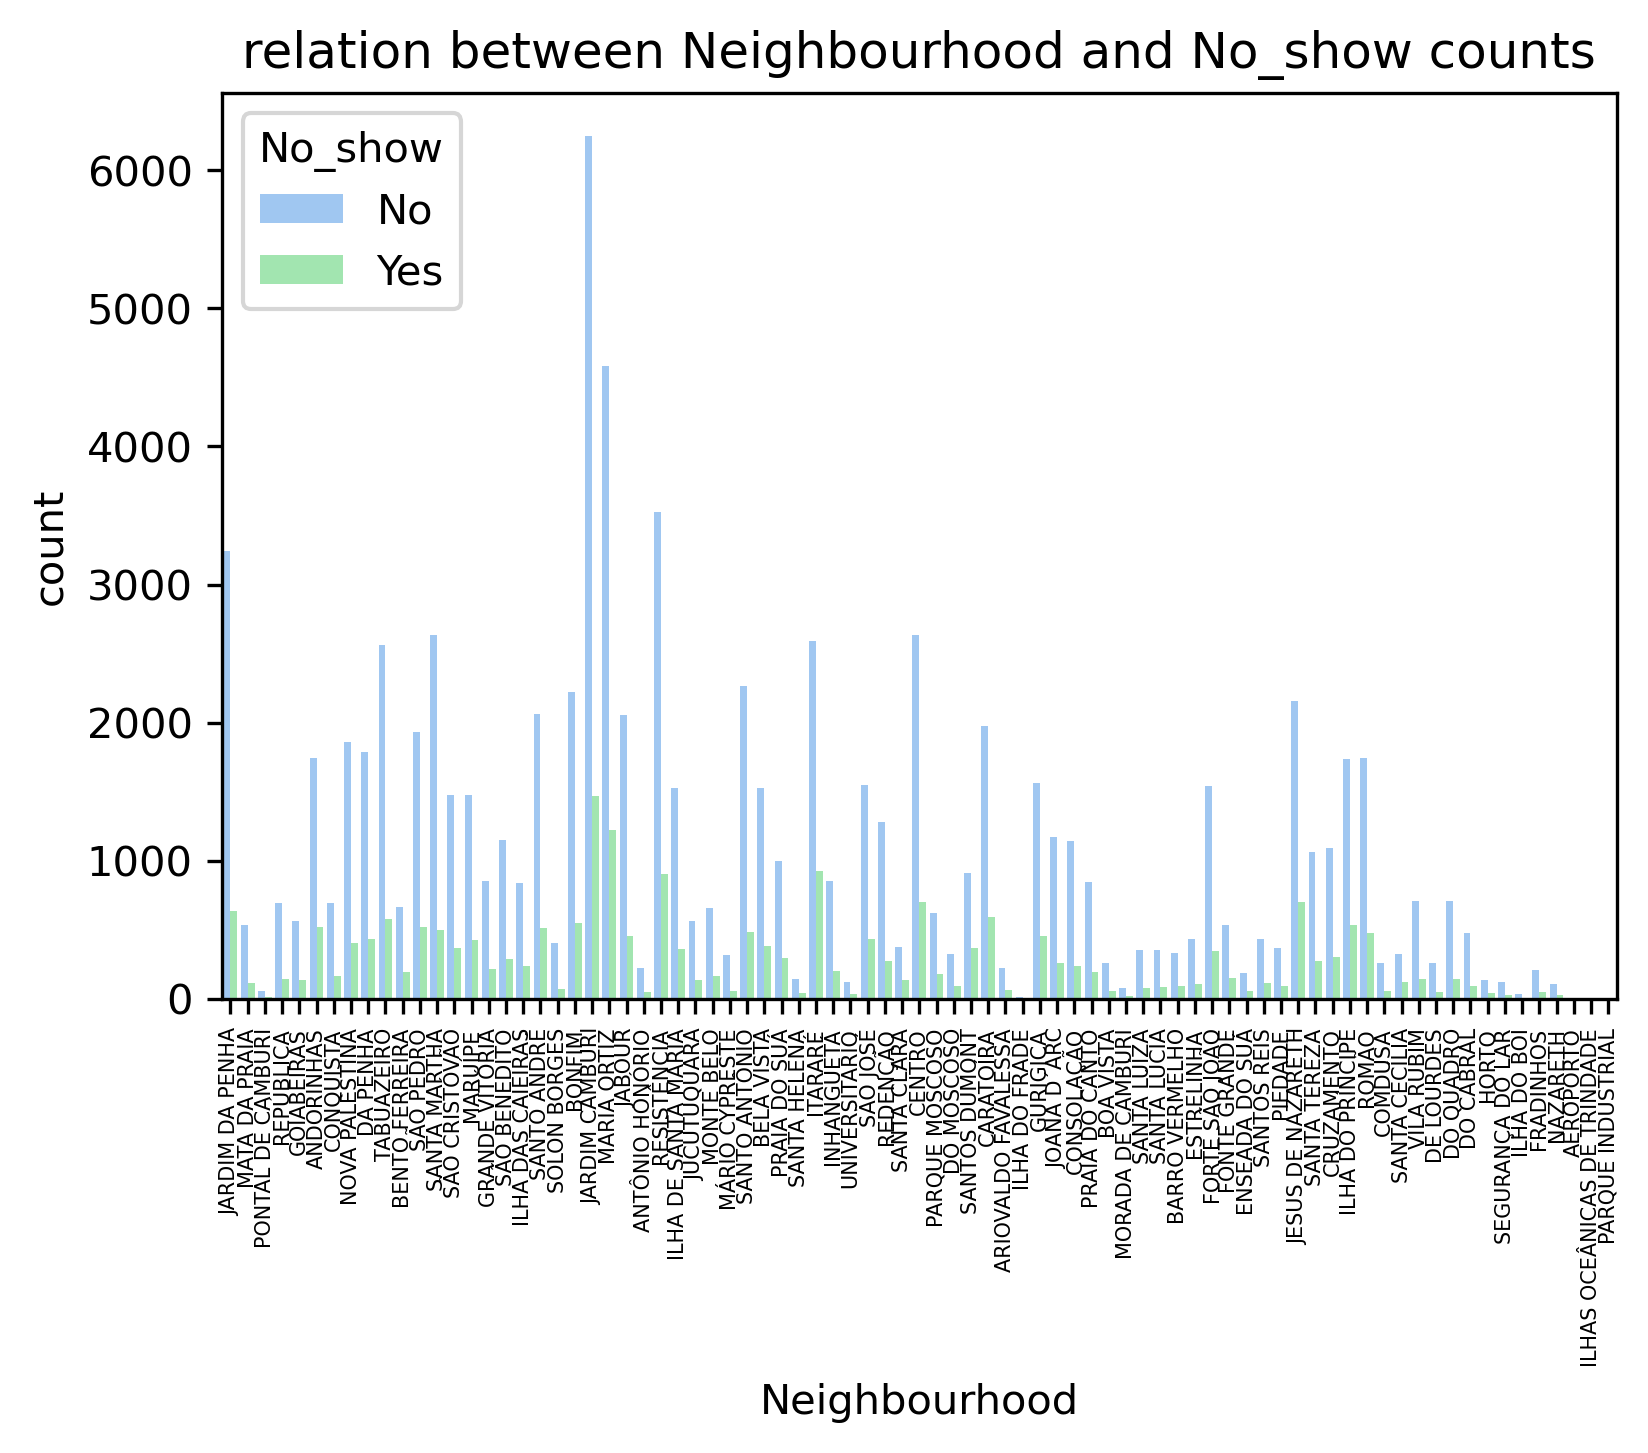

In [32]:
##showing neighborhoods against no show counts 
plt.rcParams['figure.dpi'] = 300 #increasing resolution as the huge amount of parameters made plot blurry

count_plot(df,'Neighbourhood','No_show')
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=5)

as the above plot shows, JARDIM CAMBURI neighbourhood has the hghest no show up percentage

<a id='conclusions'></a>
## Conclusions

> I1️⃣n general there are conditions where the numbers of no show ups increased but can't be said to be absolute because the percentage of the people with that case are small or tat the  like:
    <li>the day of week</li>
    <li>Scholarship, diabetes , alchoholism, handicap, hypertension(a bit better in correlation but in general not helpful)
    <li>Age groups(Adults have most no show ups but still has the largest numbers in general)</li>
<br>2️⃣receiving SMS doesn't help at all as the number of people who hasn't showed up are almost equal wether they got sn SMS or not🤷‍♀️</li>
<br>3️⃣there is a better correlation in some aspects that can be considered as effective like gender(females don't show up more often than males),JARDIM CAMBURI neighbourhood has more no show ups than other neighbourhoods

